In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EXP 4 - butterfly

In [35]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_4_butterfly'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
data4 = pd.read_csv(url)

In [36]:
data4.head()

,№,CODE,CUP_NUMBER,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_NAME
0,1,BC,1,C,NaN,15,44,Dima,59,1,44,Lera
1,2,BC,2,C,NaN,13,48,Dima,61,0,60,Lera
2,3,BC,3,C,NaN,20,55,Dima,75,1,57,Lera
3,4,BC,4,C,NaN,13,51,Dima,64,0,52,Lera
4,5,BC,5,C,NaN,24,45,Dima,69,1,45,Lera


In [37]:
data4['CODE'].unique()

array(['BC', 'B3820', 'B3830', 'B3840', 'B3850'], dtype=object)

In [38]:
data4['FERT_PC'] = data4['FERT'] / (data4['FERT'] + data4['DEAD']) * 100
data4['SHOCK_PC'] = data4['SHOCK_ALIVE'] / (data4['SHOCK_ALIVE'] + data4['SHOCK_DEAD']) * 100

In [39]:
data4.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'TEMP', 'TIME', 'DEAD', 'FERT', 'FERT_NAME',
       'TOTAL', 'SHOCK_DEAD', 'SHOCK_ALIVE', 'SHOCK_NAME', 'FERT_PC',
       'SHOCK_PC'],
      dtype='object')

In [40]:
data4_melted = pd.melt(data4, id_vars=['CODE', 'CUP_NUMBER', 'TEMP', 'TIME'], 
                      value_vars=['FERT_PC', 'SHOCK_PC'],
                      var_name='measurement', value_name='value')

In [41]:
data4_melted.head()

,CODE,CUP_NUMBER,TEMP,TIME,measurement,value
0,BC,1,C,NaN,FERT_PC,74.576271
1,BC,2,C,NaN,FERT_PC,78.688525
2,BC,3,C,NaN,FERT_PC,73.333333
3,BC,4,C,NaN,FERT_PC,79.687500
4,BC,5,C,NaN,FERT_PC,65.217391


<AxesSubplot: xlabel='measurement', ylabel='value'>

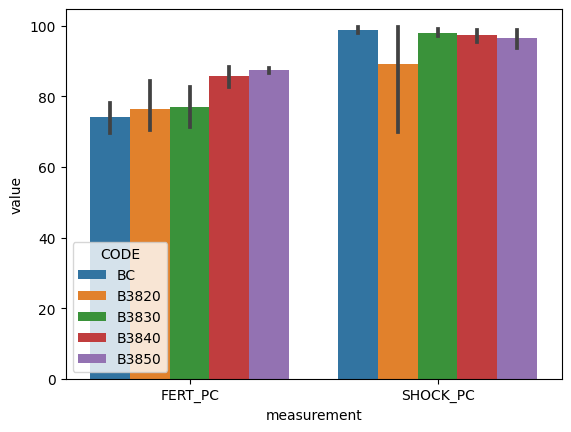

In [46]:
sns.barplot(data4_melted, x='measurement', y='value', hue='CODE')

## EXP 2 - families

In [67]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_2'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
data2 = pd.read_csv(url)

In [68]:
data2.head()

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,STAGE,TEMP,TIME,DEAD,...,24_SHOCK_DEAD,24_SHOCK_ALIVE,24_SHOCK_NAME,48_SHOCK_DEAD,48_SHOCK_NAME,HATCHED,HATCHED_NAME,SWIM_DEAD,SWIM_NAME,SWIM
0,1,11CG37120,1,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,11СG37120,2,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,11СG37120,3,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,11СG37120,4,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,12СG37120,1,1,2,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [69]:
data2_v = data2[(data2['STAGE'] == 'V') | (data2['TEMP'] == 'C')]
data2_v = data2_v.drop(['48_SHOCK_DEAD', '48_SHOCK_NAME'], axis=1)

In [70]:
data2_v.head()

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,STAGE,TEMP,TIME,DEAD,...,SHOCK_ALIVE,SHOCK_NAME,24_SHOCK_DEAD,24_SHOCK_ALIVE,24_SHOCK_NAME,HATCHED,HATCHED_NAME,SWIM_DEAD,SWIM_NAME,SWIM
64,65,11СGC,1,1,1,С,G,C,NaN,12.0,...,50.0,Sasha,0.0,NaN,Alya,49.0,Vika,0.0,Vika,49
65,66,11СGC,2,1,1,С,G,C,NaN,6.0,...,38.0,Sasha,1.0,NaN,Alya,36.0,Vika,0.0,Vika,36
66,67,11СGC,3,1,1,С,G,C,NaN,6.0,...,82.0,Sasha,2.0,NaN,Alya,77.0,Vika,4.0,Vika,73
67,68,11СGC,4,1,1,С,G,C,NaN,8.0,...,26.0,Sasha,0.0,NaN,Alya,24.0,Vika,0.0,Vika,24
68,69,12СGC,1,1,2,С,G,C,NaN,11.0,...,14.0,Lera,0.0,NaN,Lera,13.0,Sasha,NaN,NaN,13


In [58]:
data2_v['CODE'].unique()

array(['11СGC', '12СGC', '21СGC', '22СGC', '11MGC', '12MGC', '21MGC',
       '22MGC', '11СV3840', '12СV3840', '21СV3840', '22СV3840',
       '11СV3830', '12СV3830', '21СV3830', '22СV3830', '11MV3840',
       '12MV3840', '21MV3840', '22MV3840', '11MV3830', '12MV3830',
       '21MV3830', '22MV3830'], dtype=object)

In [45]:
data2.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'FEMALE', 'MALE', 'MUT', 'STAGE', 'TEMP',
       'TIME', 'DEAD', 'FERT', 'FERT_NAME', 'TOTAL', 'SHOCK_DEAD',
       'SHOCK_ALIVE', 'SHOCK_NAME', '24_SHOCK_DEAD', '24_SHOCK_ALIVE',
       '24_SHOCK_NAME', '48_SHOCK_DEAD', '48_SHOCK_NAME', 'HATCHED',
       'HATCHED_NAME'],
      dtype='object')

In [71]:
data2['FERT_PC'] = data2['FERT'] / (data2['FERT'] + data2['DEAD']) * 100
data2['SHOCK_PC'] = data2['SHOCK_ALIVE'] / data2['FERT'] * 100
data2['HATCHED_PC'] = data2['HATCHED'] / data2['FERT'] * 100
data2['SWIM_PC'] = data2['SWIM'] / data2['FERT'] * 100

In [73]:
data2_melted = pd.melt(data2, id_vars=['CODE', 'CUP_NUMBER', 'TEMP', 'TIME'], 
                      value_vars=['FERT_PC', 'SHOCK_PC', 'HATCHED_PC', 'SWIM_PC'],
                      var_name='measurement', value_name='value')

In [74]:
data2_melted.head()

,CODE,CUP_NUMBER,TEMP,TIME,measurement,value
0,11CG37120,1,37,120.0,FERT_PC,NaN
1,11СG37120,2,37,120.0,FERT_PC,NaN
2,11СG37120,3,37,120.0,FERT_PC,NaN
3,11СG37120,4,37,120.0,FERT_PC,NaN
4,12СG37120,1,37,120.0,FERT_PC,NaN


/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean o

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot: xlabel='CODE', ylabel='value'>

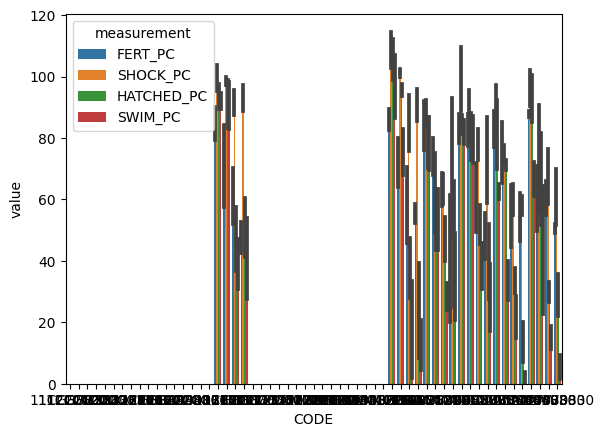

In [75]:
sns.barplot(data2_melted, x='CODE', y='value', hue='measurement')

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/

/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean o

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

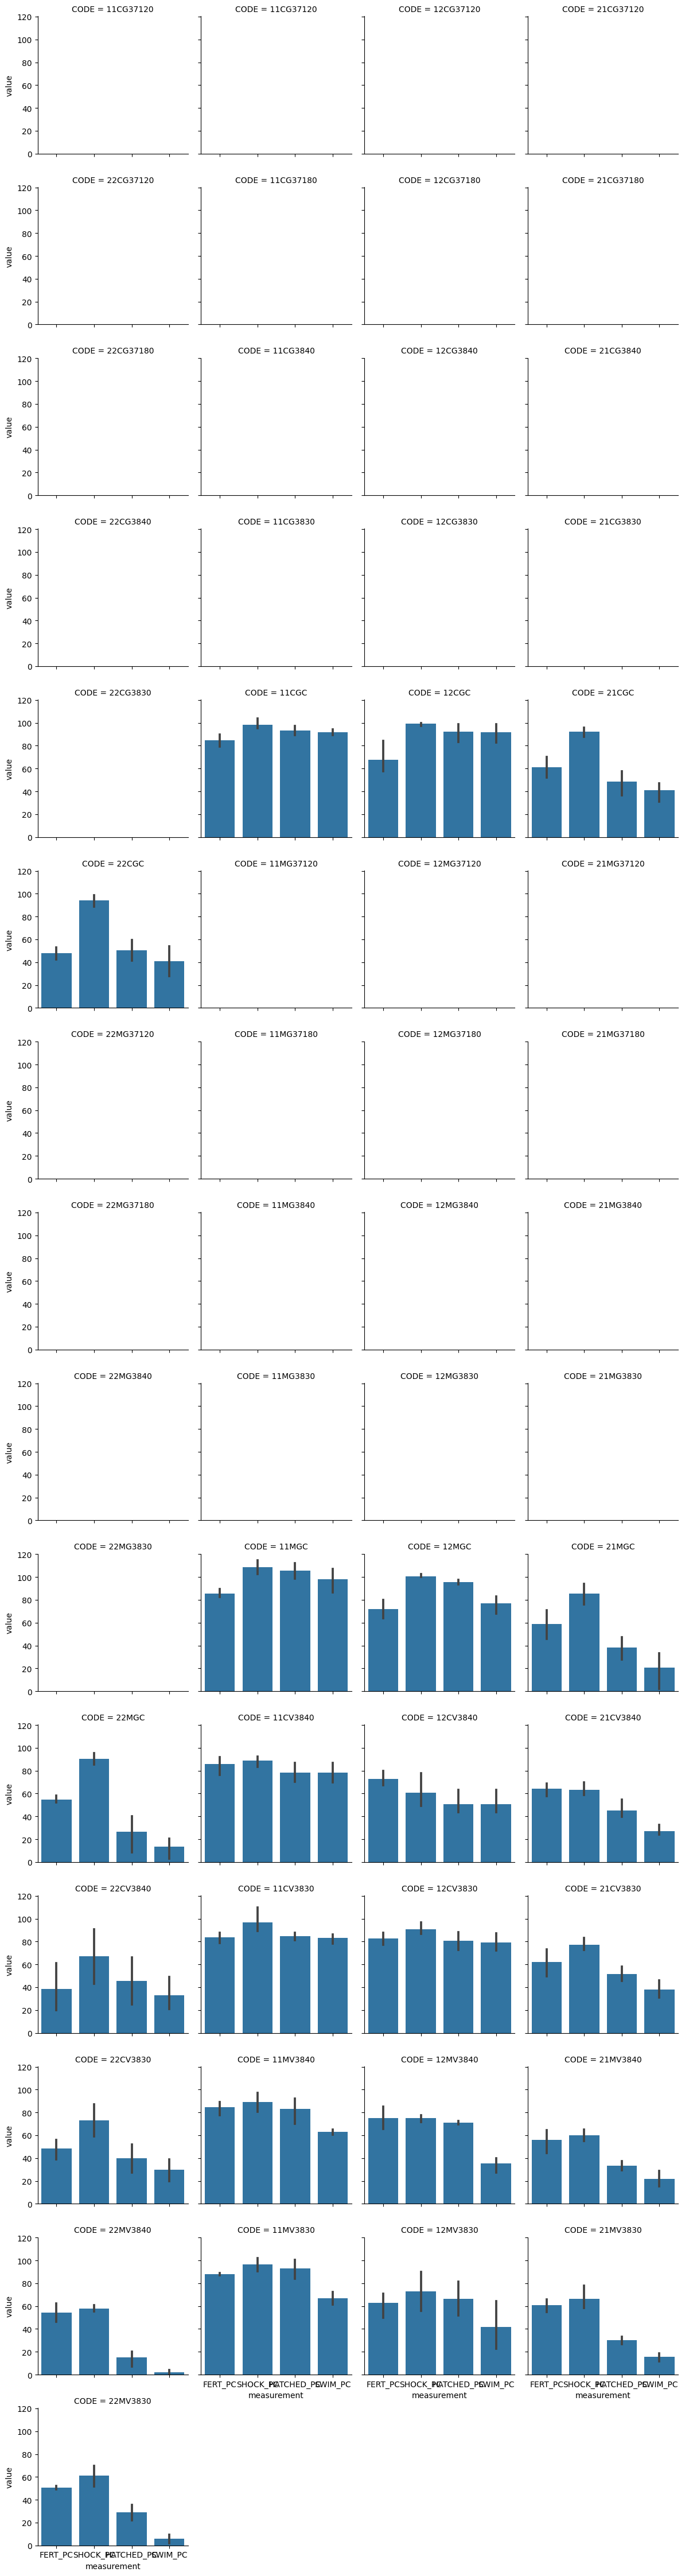

In [83]:
g = sns.FacetGrid(data2_melted, col='CODE', col_wrap=4)
g.map(sns.barplot, "measurement", "value")
g.add_legend()